Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

p = PolynomialFeatures(1)
phi = p.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

w = inv(phi.transpose().dot(phi)).dot(phi.transpose()).dot(y)
print(w)

w = pinv(phi).dot(y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143

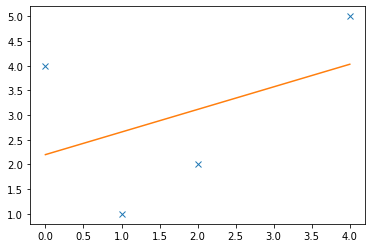

In [6]:
from sklearn.metrics import mean_squared_error

h = lambda x : x.dot(w)
plt.plot(X, y, "x")
plt.plot(X, h(phi))
mean_squared_error(y, h(phi))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
inv(phi).dot(y)
 

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)
print(lr.coef_)
print(lr.intercept_)

pred = lr.predict(X)
mean_squared_error(y, pred)

[0.45714286]
2.2


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return list(map((lambda x : f(x) + normal(0, noise)), X))

In [10]:
def make_instances(x1, x2, N):
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
instances = make_instances(-5, 5, 50)
labels = make_labels(instances, lambda x : 5+x-2*x**2-5*x**3, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

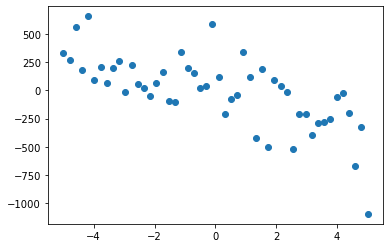

In [12]:
plt.scatter(instances, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

45953.57848371798

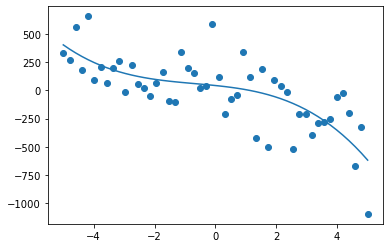

In [14]:
plt.scatter(instances, labels)
p = PolynomialFeatures(3)
x2 = p.fit_transform(instances)
model = LinearRegression().fit(x2, labels)
pred = model.predict(x2)
plt.plot(instances, pred)

mean_squared_error(labels, pred)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

54124.53094044816
35143.69598081414
32267.938935540427
29840.749240671503
22320.671224159873


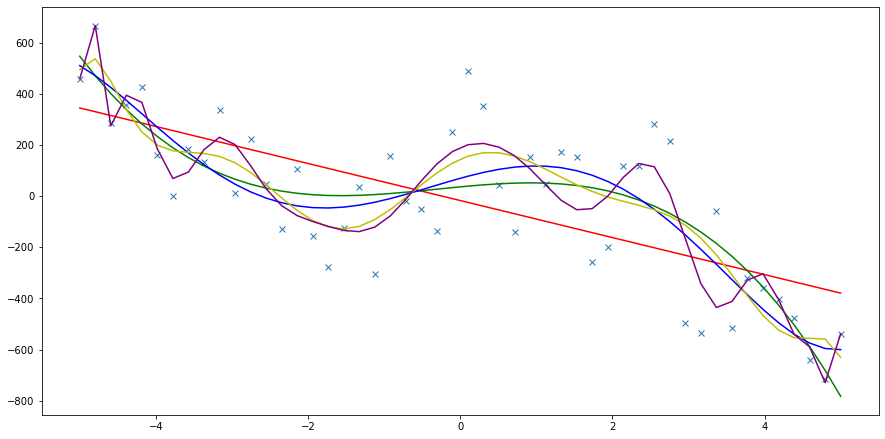

In [13]:
x1 = PolynomialFeatures(1).fit_transform(instances)
x2 = PolynomialFeatures(3).fit_transform(instances)
x3 = PolynomialFeatures(5).fit_transform(instances)
x4 = PolynomialFeatures(10).fit_transform(instances)
x5 = PolynomialFeatures(20).fit_transform(instances)


model1 = LinearRegression().fit(x1, labels)
model2 = LinearRegression().fit(x2, labels)
model3 = LinearRegression().fit(x3, labels)
model4 = LinearRegression().fit(x4, labels)
model5 = LinearRegression().fit(x5, labels)

pred1 = model1.predict(x1)
pred2 = model2.predict(x2)
pred3 = model3.predict(x3)
pred4 = model4.predict(x4)
pred5 = model5.predict(x5)

plt.figure(figsize=(15,7.5))
plt.plot(instances, labels, "x")
plt.plot(instances, pred1, "r")
plt.plot(instances, pred2, "g")
plt.plot(instances, pred3, "b")
plt.plot(instances, pred4, "y")
plt.plot(instances, pred5, "purple")

print(mean_squared_error(labels, pred1))
print(mean_squared_error(labels, pred2))
print(mean_squared_error(labels, pred3))
print(mean_squared_error(labels, pred4))
print(mean_squared_error(labels, pred5))

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

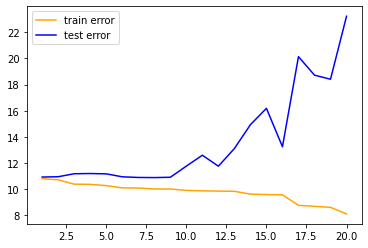

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)

train_err = []
test_err = []

for d in range(1, 21):
    p = PolynomialFeatures(d)
    model = LinearRegression().fit(p.fit_transform(X_train), y_train)
    pred_train = model.predict(p.fit_transform(X_train))
    train_err.append(np.log(mean_squared_error(y_train, pred_train)))
    pred_test = model.predict(p.fit_transform(X_test))
    test_err.append(np.log(mean_squared_error(y_test, pred_test)))
    
plt.plot(range(1,21), train_err, "orange", label="train error")
plt.plot(range(1,21), test_err, "blue", label="test error")

plt.legend(loc="upper left")

(c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

<Figure size 1080x540 with 0 Axes>

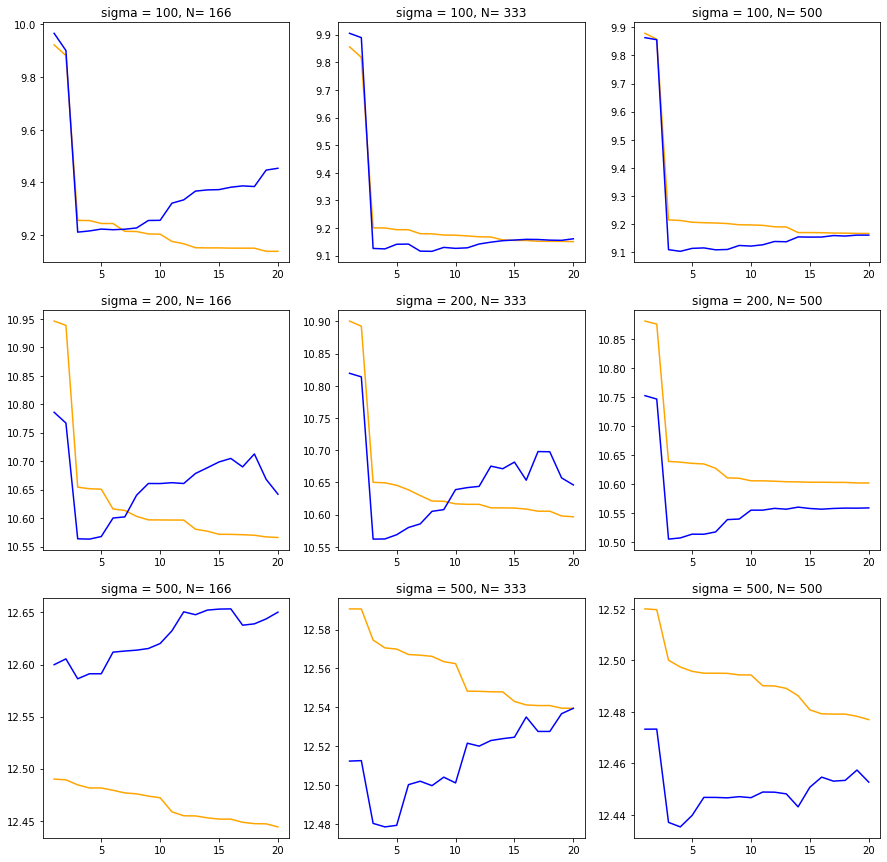

In [18]:
instances2 = make_instances(-5, 5, 1000)

x_train, x_test = train_test_split(instances2, test_size=0.5, random_state=42)
plt.figure(figsize=(15,7.5))
f, axarr = plt.subplots(3,3,figsize=(15,15))

for i, sigma in enumerate([100, 200, 500]):
    y_train = make_labels(x_train, lambda x : 5+x-2*x**2-5*x**3, sigma)
    y_test = make_labels(x_test, lambda x : 5+x-2*x**2-5*x**3, sigma)
    for j in range(0, 3):
        x_train_split = x_train[:len(x_train)*(j+1)//3]
        x_test_split = x_test[:len(x_test)*(j+1)//3]
        y_train_split = y_train[:len(y_train)*(j+1)//3]
        y_test_split = y_test[:len(y_test)*(j+1)//3]
        train_error = []
        test_error = []
        for d in range(1, 21):
            p = PolynomialFeatures(d)
            model = LinearRegression().fit(p.fit_transform(x_train_split), y_train_split)
            pred_train = model.predict(p.fit_transform(x_train_split))
            train_error.append(np.log(mean_squared_error(y_train_split, pred_train)))
            pred_test = model.predict(p.fit_transform(x_test_split))
            test_error.append(np.log(mean_squared_error(y_test_split, pred_test)))
        axarr[i, j].title.set_text("sigma = {0}, N= {1}".format(sigma, len(x_train_split)))
        axarr[i, j].plot(range(1,21), train_error, "orange", label="train error")
        axarr[i, j].plot(range(1,21), test_error, "blue", label="test error")
        
        
       
        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
def f(l, n): 
    m = l*np.identity(n)
    m[0, 0] = 0
    return m

phi2 = PolynomialFeatures(3).fit_transform(X)
for l in [0, 1, 10]:
    w = inv(phi2.transpose().dot(phi2) + f(l, 4)).dot(phi2.transpose()).dot(y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge

for alpha in [0, 1, 10]:
    model = Ridge(alpha)
    model.fit(phi2, y)
    print(model.intercept_)
    print(model.coef_)

4.000000000000025
[ 0.         -5.91666667  3.375      -0.45833333]
3.0569614512471652
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
2.4944418431229733
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

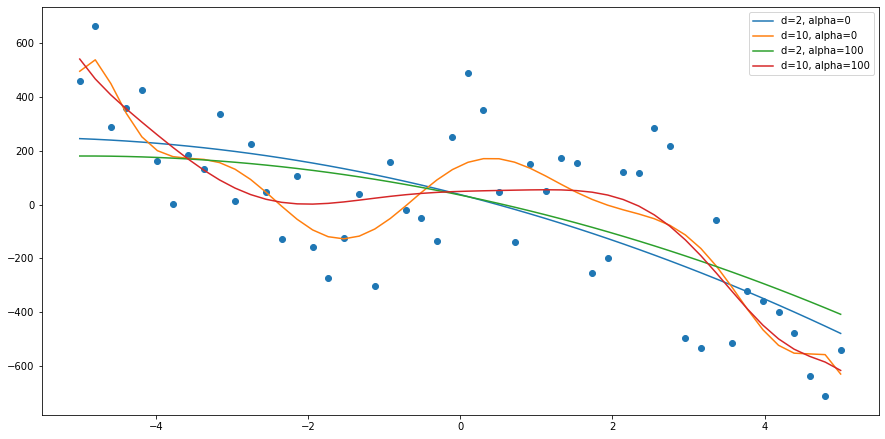

In [18]:
plt.figure(figsize(15, 7.5))
plt.scatter(instances, labels)
for alpha in [0, 100]:
    for d in [2, 10]:
        p = PolynomialFeatures(d)
        dm = p.fit_transform(instances)
        model = Ridge(alpha)
        model.fit(dm, labels)
        plt.plot(instances, model.predict(dm), label="d={0}, alpha={1}".format(d, alpha))
plt.legend()    

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


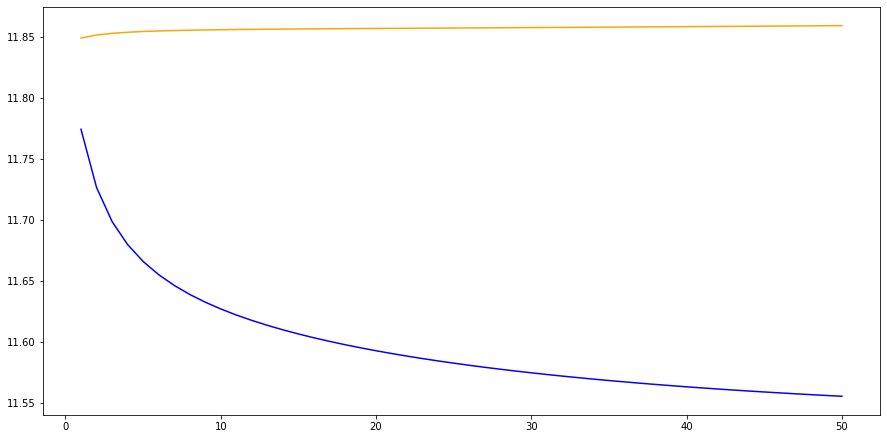

In [23]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(instances, labels, test_size=0.5, random_state=42)

p = PolynomialFeatures(10)
dm_train = p.fit_transform(x_train2)
dm_test = p.fit_transform(x_test2)

test_e = []
train_e = []

for l in range(1, 51):
    model = Ridge(l)
    model.fit(dm_train, y_train2)
    train_e.append(np.log(mean_squared_error(y_test2, model.predict(dm_train))))
    test_e.append(np.log(mean_squared_error(y_train2, model.predict(dm_test))))

plt.plot(range(1,51), train_e, "orange", label="train error")
plt.plot(range(1,51), test_e, "blue", label="test error")

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

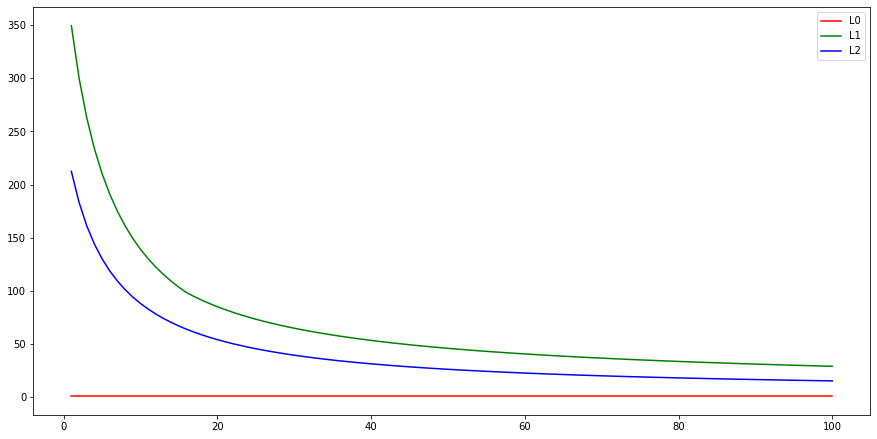

In [25]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5)

p = PolynomialFeatures(5)
d_matrix_train = p.fit_transform(X_train)

l0_norm = []
l1_norm = []
l2_norm = []

for l in range(1, 101):
    model_ridge = Ridge(l, fit_intercept=False)
    model_ridge.fit(d_matrix_train, y_train)
    w = model_ridge.coef_
    l0_norm.append(nonzeroes(w))
    l1_norm.append(sum(abs(w)))
    l2_norm.append(norm(w))
    
plt.plot(range(1, 101), l0_norm, "r", label="L0")
plt.plot(range(1, 101), l1_norm, "g", label="L1")
plt.plot(range(1, 101), l2_norm, "b", label="L2")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Users\msusi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129793.75188558377, tolerance: 265.91594769470606
  model = cd_fast.enet_coordinate_descent(
C:\Users\msusi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69355.56108276435, tolerance: 265.91594769470606
  model = cd_fast.enet_coordinate_descent(
C:\Users\msusi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43996.26509918779, tolerance: 265.91594769470606
  model = cd_fast.enet_coordinate_descent(
C:\Users\msusi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

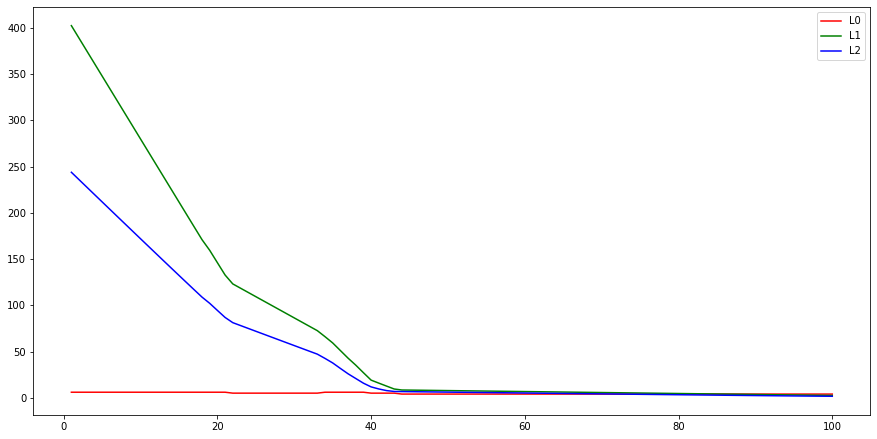

In [26]:
from sklearn.linear_model import Lasso

l0_norm = []
l1_norm = []
l2_norm = []

for l in range(1, 101):
    model = Lasso(l, fit_intercept=False)
    model.fit(d_matrix_train, y_train)
    w = model.coef_
    l0_norm.append(nonzeroes(w))
    l1_norm.append(sum(abs(w)))
    l2_norm.append(norm(w))

plt.plot(range(1, 101), l0_norm, "r", label="L0")
plt.plot(range(1, 101), l1_norm, "g", label="L1")
plt.plot(range(1, 101), l2_norm, "b", label="L2")
plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

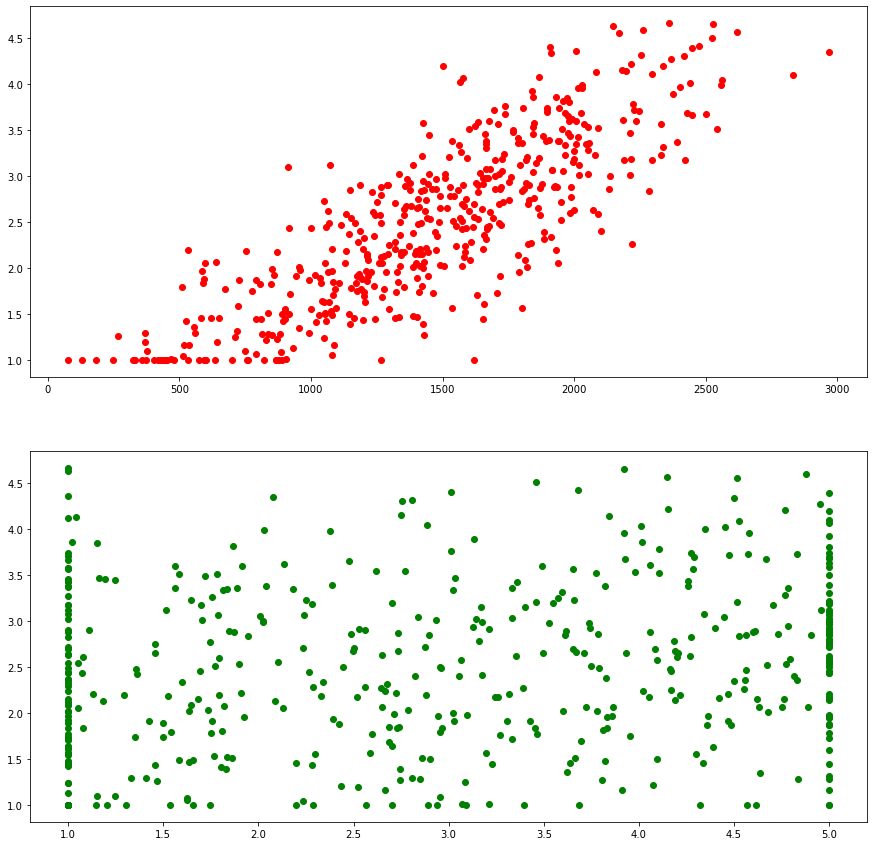

In [28]:
plt.figure(figsize(15, 15))
plt.subplot(2, 1, 1)
plt.plot(exam_score, grades_y, "ro")
plt.subplot(2, 1, 2)
plt.plot(grade_in_highschool, grades_y, "go")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]


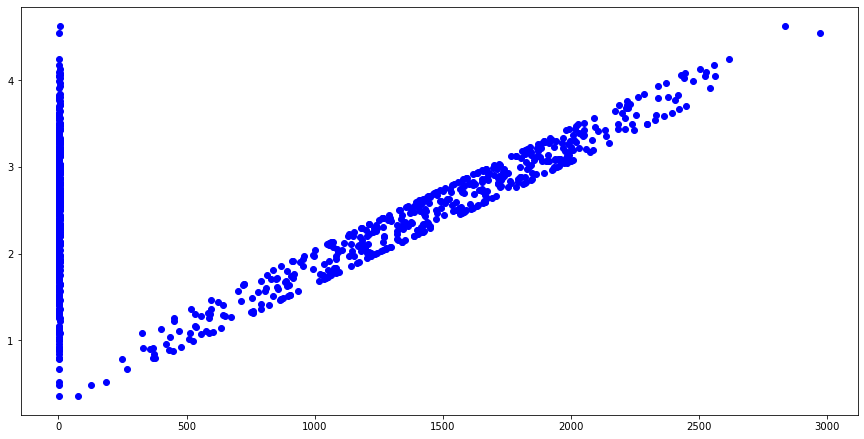

In [29]:
model = Ridge(0.01)
model.fit(grades_X, grades_y)

prediction = model.predict(grades_X)
print(model.coef_)

plt.figure(figsize=(15, 7.5))
plt.plot(grades_X, prediction, 'bo')


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
grades_X_fixed= scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

model.fit(grades_X_fixed, grades_y_fixed)
print(model.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [31]:
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:, 1], axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [32]:
model = Ridge(0.01)
model.fit(grades_X_fixed_colinear, grades_y)

prediction = model.predict(grades_X_fixed_colinear)
print(model.coef_)

[0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [33]:
w1 = []
w2 = []
model1 = Ridge(0.01)
model2 = Ridge(1000)

for i in range(0, 10):
    ind = random.choice(500, 250, replace=False)
    model1.fit(grades_X_fixed_colinear[ind], grades_y_fixed[ind])
    w1.append(model1.coef_)
    model2.fit(grades_X_fixed_colinear[ind], grades_y_fixed[ind])
    w2.append(model2.coef_)
    
for i in range(10):
    print(w1[i][0])
    print(w2[i][0])
    print()

[0.84344967 0.08902444 0.08902444]
[0.16419725 0.02816756 0.02816756]

[0.82496436 0.0743091  0.0743091 ]
[0.16837778 0.04200572 0.04200572]

[0.81998306 0.07417031 0.07417031]
[0.16675609 0.03992155 0.03992155]

[0.79865227 0.07669605 0.07669605]
[0.16232085 0.03253696 0.03253696]

[0.83814641 0.06956705 0.06956705]
[0.17099764 0.03987356 0.03987356]

[0.82458024 0.10887909 0.10887909]
[0.15003014 0.03454006 0.03454006]

[0.82753018 0.08767275 0.08767275]
[0.17269709 0.04318487 0.04318487]

[0.81999026 0.0856458  0.0856458 ]
[0.1670921 0.0357689 0.0357689]

[0.810926  0.1092402 0.1092402]
[0.16044761 0.05071806 0.05071806]

[0.81087976 0.0769835  0.0769835 ]
[0.16131422 0.03525785 0.03525785]



**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.